In [49]:
import matplotlib.pyplot as plt

In [50]:
def read_csv(csv_file):
  csv_lst = []
  with open(csv_file) as f:
    lines = f.read().split('\n')[:-1]
    for line in lines:
      row = line.split(",")
      csv_lst.append([int(row[0]), int(row[1])])
  return csv_lst

In [51]:
data = read_csv("./Assignment Data/Q3/Points.csv")
data_x = [x[0] for x in data]
data_y = [y[1] for y in data]

From the following graph, we know that there should be 3 clusters.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


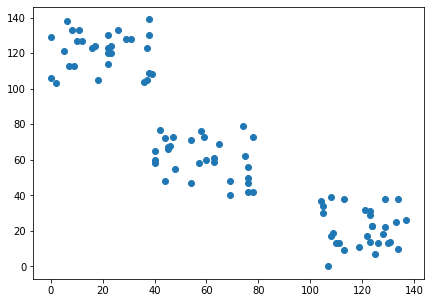

In [52]:
fig = plt.figure(figsize=(7,5))
plt.scatter(data_x, data_y)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


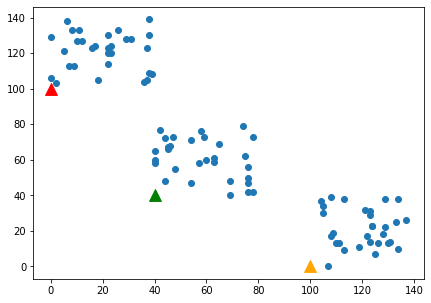

In [53]:
fig = plt.figure(figsize=(7,5))
initial_means = [[40, 40], [100, 0], [0, 100]]
initial_means_x = [x[0] for x in initial_means]
initial_means_y = [y[1] for y in initial_means]
plt.scatter(data_x, data_y)
for x, y, c in zip(initial_means_x, initial_means_y, ["green", "orange", "red"]):
  plt.scatter(x, y, marker="^", color=c, s=140)
fig.show()

In [54]:
def euclidean_distance(p1_x, p2_x, p1_y, p2_y):
  x = ((p2_x-p1_x)**2)
  y = ((p2_y-p1_y)**2)
  return (x+y)**(1/2)

In [55]:
def cal_mean(points):
  mean_x = 0
  mean_y = 0
  for point in points:
    mean_x += point[0]
    mean_y += point[1]
  mean_x = mean_x/len(points)
  mean_y = mean_y/len(points)
  return [mean_x, mean_y]

In [56]:
def k_means(points, k, itr=100):
  N, M = len(points), len(points[0])

  cluster_num = [0 for i in range(N)]
  
  means = [[40, 40], [100, 0], [0, 100]]

  for i in range(itr):
    dist = dict([(k,[]) for k in range(N)])

    for p_idx, p in enumerate(points):
      for mean in means:
        dist[p_idx].append(euclidean_distance(p[0], mean[0], p[1], mean[1]))
    
    cluster_num = []
    for p_dist_idx, p_dist in enumerate(dist):
      min_val = min(dist[p_dist])
      min_val_idx = [i for i, v in enumerate(dist[p_dist]) if v == min_val][0]
      cluster_num.append(min_val_idx)
  
    for k_class in range(k):
      curr_point_idx_class = []
      for cn_idx, cn in enumerate(cluster_num):
        if cn == k_class:
          curr_point_idx_class.append(points[cn_idx])
      means[k_class] = cal_mean(curr_point_idx_class)
  
  return means

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


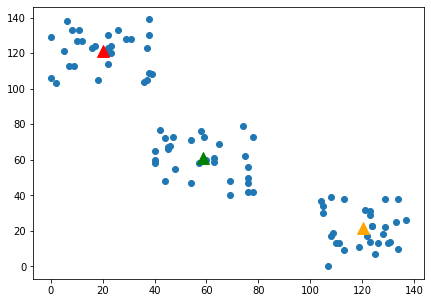

In [57]:
fig = plt.figure(figsize=(7,5))
kmeans = k_means(data, 3)
kmeans_x = [x[0] for x in kmeans]
kmeans_y = [y[1] for y in kmeans]
plt.scatter(data_x, data_y)
for x, y, c in zip(kmeans_x, kmeans_y, ["green", "orange", "red"]):
  plt.scatter(x, y, marker="^", color=c, s=140)
fig.show()